# 훈련 세트와 테스트 세트

### 생선 분류
- 앞의 예에서 훈련데이터에서 도미를 100% 완벽하게 분류함
    - 문제점 : 정답을 미리 알려주고 시험보는 것과 같음
    
    
-  훈련한 데이터와 평가에 사용된 데이터가 달라야 함

## Data Split과 모델 검증

- 언제
    - "충분히 큰" 데이터 세트를 가용할 때
    - "충분히 큰" 데이터가 없을 때에는 교차 확인(Cross Validation) 고려
    

- 왜
    - 학습에 사용되지 않은 데이터를 사용하여 예측을 수행함으로써 모델의 일반적인 성능에 대한 적절한 예측을 함
    

- 어떻게
    - 홀드-아웃(Hold-out)
    - 교차검증(Cross Validation,CV)
    - 필요에 따라 Stratified Sampling

### 홀드-아웃 방식
- 데이터를 두 개 세트로 나누어 각각 Train과 Test 세트로 사용
- Train과 Test의 비율을 7:3 ~ 9:1로 널리 사용하나, 알고리즘의 특성 및 상황에 따라 적절한 비율을 사용
- Train – Validation - Test로 나누기도 함

## 훈련 세트와 테스트 세트

In [3]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 
               9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
               12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
               475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
               575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
               920.0, 955.0, 925.0, 975.0, 950.0, 
               6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
fish_data = [[l,w] for l, w in zip(fish_length,fish_weight)]
fish_target = [1]*35 + [0]*14

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
kn = KNeighborsClassifier()

**훈련 데이터셋과 테스트 데이터셋으로 분리**

In [62]:
train_data = fish_data[:35]
train_target = fish_target[:35]

test_data = fish_data[35:]
test_target = fish_target[35:]

**학습 및 평가**

In [10]:
kn.fit(train_data, train_target)

KNeighborsClassifier()

In [11]:
kn.score(test_data, test_target)

0.0

In [12]:
print(train_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [13]:
print(test_target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 왜? 성능이 0.0일까?

**편향(biased)된 데이터 셋 구성** 때문에

- 샘플링 편향(Sampling Bias)

### 올바른 훈련데이터와 테스트데이터 구성하기

In [14]:
import numpy as np

In [19]:
print(type(fish_data))

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(type(input_arr))

<class 'list'>
<class 'numpy.ndarray'>


In [21]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [20]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [23]:
print(input_arr.shape)

(49, 2)


In [27]:
index = np.arange(49)
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [28]:
np.random.seed(42)
np.random.shuffle(index)

- [참고]: random.seed()
    - 난수를 생성하기 위한 초기값 지정
    - seed를 지정하면 랜덤함수의 결과를 동일하게 재현할 수 있음

In [29]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [42]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [49]:
index[:35]

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2])

In [54]:
input_arr[[13,45,47]]

array([[ 32. , 340. ],
       [ 12.4,  13.4],
       [ 14.3,  19.7]])

In [43]:
input_arr[index[:35]]

array([[  32. ,  340. ],
       [  12.4,   13.4],
       [  14.3,   19.7],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  36. ,  714. ],
       [  35. ,  720. ],
       [  35. ,  725. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  31.5,  500. ],
       [  29. ,  430. ],
       [  41. ,  950. ],
       [  30. ,  450. ],
       [  29. ,  363. ],
       [  29.7,  500. ],
       [  11.3,    8.7],
       [  11.8,   10. ],
       [  13. ,   12.2],
       [  32. ,  600. ],
       [  30.7,  500. ],
       [  33. ,  700. ],
       [  35. ,  700. ],
       [  41. ,  975. ],
       [  38.5,  920. ],
       [  25.4,  242. ],
       [  12. ,    9.8],
       [  39.5,  925. ],
       [  29.7,  450. ],
       [  37. , 1000. ],
       [  31. ,  500. ],
       [  10.5,    7.5],
       [  26.3,  290. ],
       [  34. ,  685. ],
       [  26.5,  340. ]])

In [55]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [65]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [66]:
import matplotlib.pyplot as plt

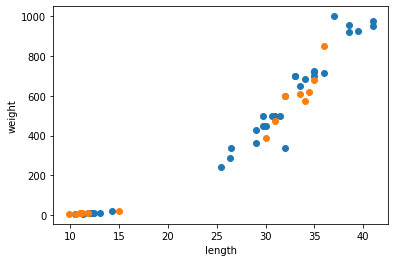

In [64]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [67]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [68]:
kn.score(test_input, test_target)

0.5714285714285714

In [69]:
print(test_input)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]


In [75]:
# 14개 중 8개가 도미임
print(8/14)

0.5714285714285714


In [70]:
kn.predict(test_input)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [71]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])